In [20]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train,x_test = x_train.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1)

In [21]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
abc = np.array([1,2,3,1,2,1,2])
np.where(abc==1)

(array([0, 3, 5]),)

In [23]:
np.where(y_train == 1)[0][1]

6

In [24]:
temp_list = []
for j in range(10):
  temp = []
  for i in range(10):
    temp.append(np.where(y_train == i)[0][j])
  temp_list.append(temp)
temp_list

[[1, 3, 5, 7, 2, 0, 13, 15, 17, 4],
 [21, 6, 16, 10, 9, 11, 18, 29, 31, 19],
 [34, 8, 25, 12, 20, 35, 32, 38, 41, 22],
 [37, 14, 28, 27, 26, 47, 36, 42, 46, 33],
 [51, 23, 76, 30, 53, 65, 39, 52, 55, 43],
 [56, 24, 82, 44, 58, 100, 62, 71, 85, 45],
 [63, 40, 109, 49, 60, 132, 66, 79, 94, 48],
 [68, 59, 117, 50, 61, 138, 73, 84, 97, 54],
 [69, 67, 120, 74, 64, 145, 83, 91, 125, 57],
 [75, 70, 122, 86, 89, 173, 90, 96, 137, 80]]

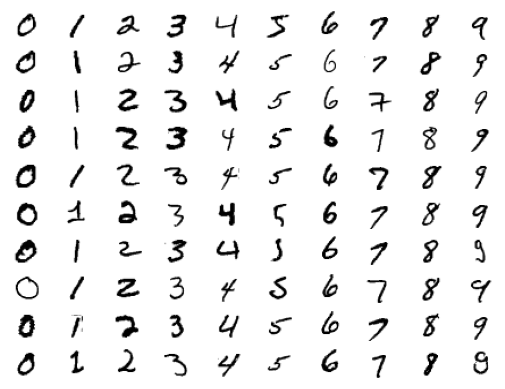

In [25]:
import matplotlib.pyplot as plt
count = 1
for lists in temp_list:
  for number in lists:
    plt.subplot(10,10,count)
    count += 1
    plt.imshow(x_train[number],cmap='gray_r')
    plt.axis('off')
plt.show()


컨볼류션  + Dense

In [26]:
# LeNet-5
# C-P-C-P-C-FC-FC

In [27]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [28]:
print(x_train_scaled.shape[1:])
inputs = tf.keras.Input(shape=x_train_scaled.shape[1:])
x = tf.keras.layers.Conv2D(6,kernel_size=3,activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(16,kernel_size=3,activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(120,kernel_size=3,activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(80,activation='relu')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

(28, 28, 1)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 120) 

In [29]:
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("mode1.h5")
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2,callbacks=[model_checkpoint_cb,early_stopping_cb])

Epoch 1/100
1500/1500 [==============================] - 9s 4ms/step - loss: 0.1950 - accuracy: 0.9394 - val_loss: 0.0698 - val_accuracy: 0.9787
Epoch 2/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0621 - accuracy: 0.9808 - val_loss: 0.0606 - val_accuracy: 0.9813
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0529 - val_accuracy: 0.9835
Epoch 4/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0443 - val_accuracy: 0.9864
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0545 - val_accuracy: 0.9827
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0458 - val_accuracy: 0.9862
Epoch 7/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0178 - accuracy: 0.9938 - val_loss: 0.0420 - val_ac

In [30]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9889


[0.037692245095968246, 0.9889000058174133]

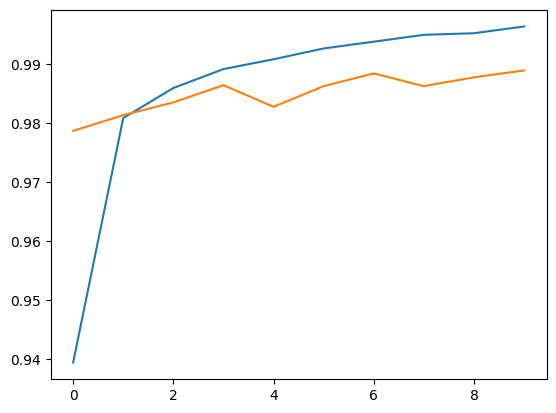

In [31]:
# 정확률
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

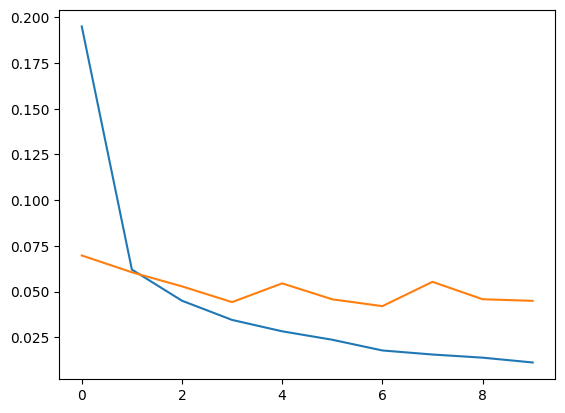

In [32]:
# 손실률
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

---------------------------------------------------------------------

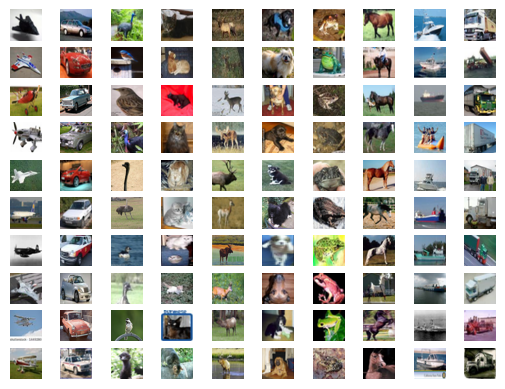

In [34]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

temp_list = []
for j in range(10):
  temp = []
  for i in range(10):
    temp.append(np.where(y_train == i)[0][j])
  temp_list.append(temp)
temp_list

import matplotlib.pyplot as plt
count = 1
for lists in temp_list:
  for number in lists:
    plt.subplot(10,10,count)
    count += 1
    plt.imshow(x_train[number],cmap='gray_r')
    plt.axis('off')
plt.show()


x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0




c-c-p-d-fc-d-fc

In [35]:
print(x_train_scaled.shape[1:])
inputs = tf.keras.Input(shape=x_train_scaled.shape[1:])
x = tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu')(inputs)
x = tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(80,activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

(32, 32, 3)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                               

In [36]:
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("mode2.h5")
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2,callbacks=[model_checkpoint_cb,early_stopping_cb])
model.evaluate(x_test_scaled,y_test)

Epoch 1/100
1250/1250 [==============================] - 8s 5ms/step - loss: 1.6031 - accuracy: 0.4166 - val_loss: 1.2685 - val_accuracy: 0.5528
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2863 - accuracy: 0.5371 - val_loss: 1.1254 - val_accuracy: 0.6021
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1552 - accuracy: 0.5849 - val_loss: 1.0376 - val_accuracy: 0.6319
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0684 - accuracy: 0.6166 - val_loss: 1.0256 - val_accuracy: 0.6423
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9969 - accuracy: 0.6437 - val_loss: 0.9942 - val_accuracy: 0.6563
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9451 - accuracy: 0.6610 - val_loss: 0.9925 - val_accuracy: 0.6605
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8854 - accuracy: 0.6800 - val_loss: 0.9516 - val_ac

[0.9630177617073059, 0.6687999963760376]

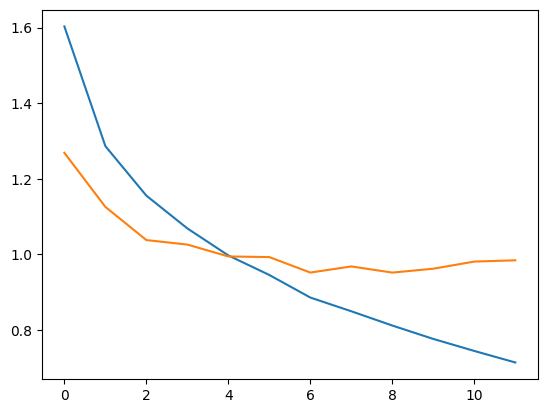

In [37]:
# 손실률
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

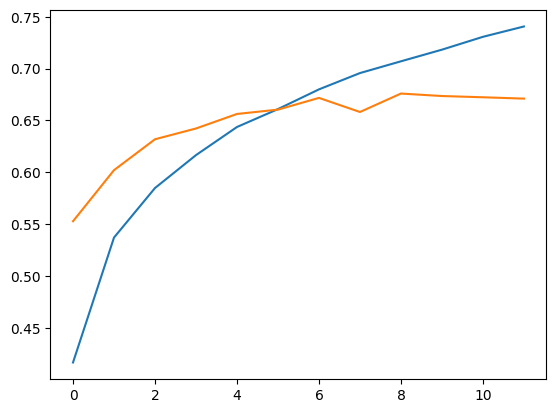

In [38]:
# 정확률
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

c-c-p-d-c-c-p-d-fc-d-fc

In [39]:
print(x_train_scaled.shape[1:])
inputs = tf.keras.Input(shape=x_train_scaled.shape[1:])
x = tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu')(inputs)
x = tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu')(x)
x = tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

(32, 32, 3)


In [40]:
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("mode3.h5")
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
history = model.fit(x_train_scaled,y_train,batch_size=128, epochs=100,validation_split=0.2,callbacks=[model_checkpoint_cb,early_stopping_cb])
model.evaluate(x_test_scaled,y_test)

Epoch 1/100
313/313 [==============================] - 7s 15ms/step - loss: 1.6991 - accuracy: 0.3725 - val_loss: 1.3753 - val_accuracy: 0.5026
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 1.3367 - accuracy: 0.5174 - val_loss: 1.2063 - val_accuracy: 0.5675
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 1.1721 - accuracy: 0.5829 - val_loss: 1.0759 - val_accuracy: 0.6209
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 1.0705 - accuracy: 0.6173 - val_loss: 0.9965 - val_accuracy: 0.6476
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.9925 - accuracy: 0.6490 - val_loss: 0.9739 - val_accuracy: 0.6459
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.9244 - accuracy: 0.6731 - val_loss: 0.8441 - val_accuracy: 0.6978
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.8726 - accuracy: 0.6930 - val_loss: 0.8848 - val_accuracy:

[0.6637694239616394, 0.7727000117301941]

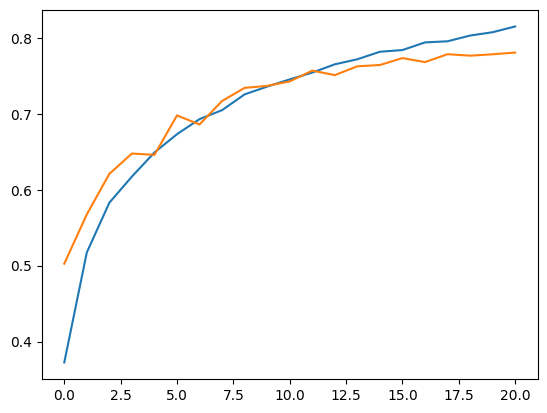

In [41]:
# 정확률
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

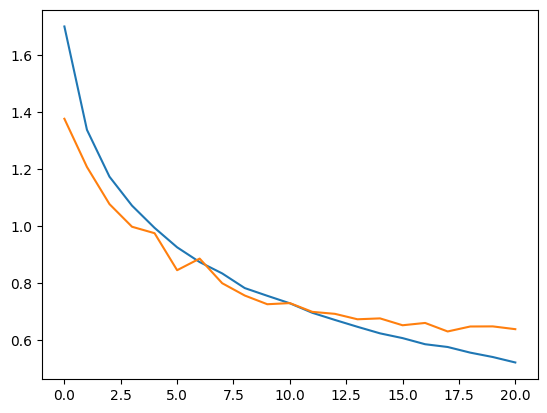

In [42]:
# 손실률
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()